# Modelo 1
Sofía Ingigerth Cañas Urbina A01173828

## Setup

In [62]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

## Prepare the data

In [63]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


## Build the model

In [72]:
model = keras.Sequential([
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.BatchNormalization(),
        layers.Dropout(0.1),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.BatchNormalization(),
        layers.Dropout(0.1),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax")])

## Train the model

In [65]:
batch_size = 128
epochs = 120

opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

H = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/120
422/422 [==============================] - 4s 7ms/step - loss: 0.7062 - accuracy: 0.7754 - val_loss: 0.9212 - val_accuracy: 0.7080
Epoch 2/120
422/422 [==============================] - 3s 7ms/step - loss: 0.4282 - accuracy: 0.8495 - val_loss: 0.3256 - val_accuracy: 0.8823
Epoch 3/120
422/422 [==============================] - 3s 7ms/step - loss: 0.3764 - accuracy: 0.8664 - val_loss: 0.3102 - val_accuracy: 0.8875
Epoch 4/120
422/422 [==============================] - 3s 7ms/step - loss: 0.3545 - accuracy: 0.8732 - val_loss: 0.2928 - val_accuracy: 0.8947
Epoch 5/120
422/422 [==============================] - 3s 7ms/step - loss: 0.3297 - accuracy: 0.8831 - val_loss: 0.2906 - val_accuracy: 0.8920
Epoch 6/120
422/422 [==============================] - 3s 7ms/step - loss: 0.3142 - accuracy: 0.8855 - val_loss: 0.2738 - val_accuracy: 0.9030
Epoch 7/120
422/422 [==============================] - 3s 7ms/step - loss: 0.3092 - accuracy: 0.8879 - val_loss: 0.2655 - val_accuracy: 0.9050

## Evaluate the trained model

In [70]:
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 batch_normalization_12 (Bat  (None, 26, 26, 32)       128       
 chNormalization)                                                
                                                                 
 dropout_28 (Dropout)        (None, 26, 26, 32)        0         
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_41 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 batch_normalization_13 (Bat  (None, 11, 11, 64)     

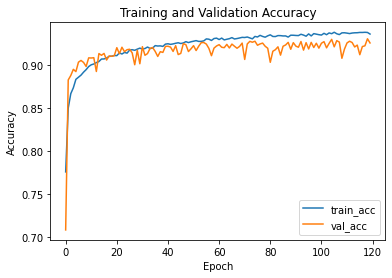

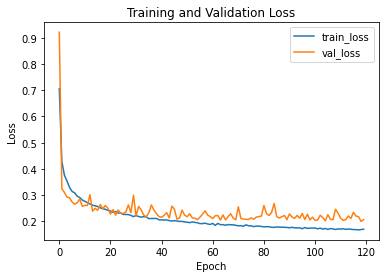

In [71]:
plt.figure()
plt.plot(np.arange(0,epochs),H.history["accuracy"],label="train_acc")
plt.plot(np.arange(0,epochs),H.history["val_accuracy"],label="val_acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.figure()
plt.plot(np.arange(0,epochs),H.history["loss"],label="train_loss") 
plt.plot(np.arange(0,epochs),H.history["val_loss"],label="val_loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()